# Fitting and Tuning Random Forest Model

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:
full_XY = pd.read_csv("full_XY.csv")

In [3]:
full_XY

,id,rating,score_care_1,score_care_2,score_care_4,score_care_5,score_care_7,score_care_9,score_care_10,score_care_11,...,score_infections_33,score_infections_34,score_infections_35,score_infections_36,score_infections_37,score_infections_38,score_infections_39,score_infections_40,score_infections_41,score_infections_42
0,10001,35.547619,255.0,84.0,92.0,86.0,165.0,40.0,80.0,6.0,...,5.692,7.0,1.230,0.459,0.825,99101.0,72.323,45.0,0.622,0.0
1,10005,33.523810,246.0,76.0,98.0,80.0,114.0,22.0,69.0,2.0,...,1.429,2.0,1.400,0.101,0.769,39531.0,12.547,4.0,0.319,0.0
2,10006,22.702381,220.0,64.0,99.0,89.0,136.0,11.0,68.0,2.0,...,3.748,8.0,2.134,0.282,0.756,60269.0,33.617,16.0,0.476,0.0
3,10007,27.555556,138.0,70.0,99.0,54.0,117.0,39.0,79.0,4.0,...,0.039,0.0,0.000,0.000,0.000,2179.0,0.946,0.0,0.000,0.0
4,10011,28.630952,290.0,66.0,78.0,73.0,148.0,52.0,91.0,3.0,...,7.599,4.0,0.526,0.399,0.691,87270.0,96.234,51.0,0.530,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2803,670096,40.000000,261.0,120.0,93.0,71.0,174.0,8.0,67.0,1.0,...,0.746,1.0,0.000,1.029,2.544,20809.0,11.445,19.0,1.660,0.0
2804,670098,38.916667,211.0,102.0,100.0,69.0,125.0,12.0,43.0,1.0,...,0.932,1.0,0.000,0.196,1.185,14521.0,9.355,5.0,0.534,0.0
2805,670103,40.555556,276.0,107.0,100.0,97.0,106.0,4.0,21.0,0.0,...,0.493,2.0,0.000,0.414,2.502,9088.0,4.429,5.0,1.129,0.0
2806,670106,26.777778,254.0,130.0,99.0,76.0,107.0,4.0,25.0,1.0,...,0.130,1.0,0.000,1.077,5.524,5008.0,2.259,6.0,2.656,0.0


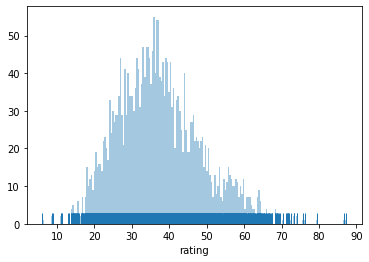

In [4]:
# Check the distribution of Y
import seaborn as sns
sns.distplot(full_XY.rating, bins=200, kde=False, rug=True);

In [46]:
# Single Run of Random Forest
def rf(df, runNumber):
    print("cv #" + str(runNumber))
    X = df.iloc[:,list(range(2,101))].values
    y = df.iloc[:, 1].values
    
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=int(100*np.random.random()))

    from sklearn.ensemble import RandomForestRegressor

    regressor = RandomForestRegressor(max_depth = 8, n_estimators=20, random_state=int(100*np.random.random()))
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    from sklearn import metrics
    
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    rsq = regressor.score(X_test,y_test)
    
    print('Mean Absolute Error:', mae)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    
    plt.plot(y_test)
    plt.plot(y_pred)
    error = abs(y_test-y_pred)
    plt.plot(error)
    plt.title('RF')
    plt.legend
    plt.show()
    print('---------------------------------------------------')
    
    return y_test, y_pred, mae, rmse, rsq

cv #1
Mean Absolute Error: 6.263197276567271
Mean Squared Error: 66.05334804182671
Root Mean Squared Error: 8.127321086423663


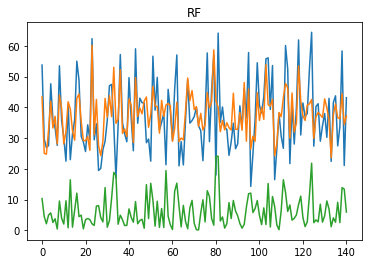

---------------------------------------------------
cv #2
Mean Absolute Error: 6.796837488821284
Mean Squared Error: 73.13411193952352
Root Mean Squared Error: 8.551848451622813


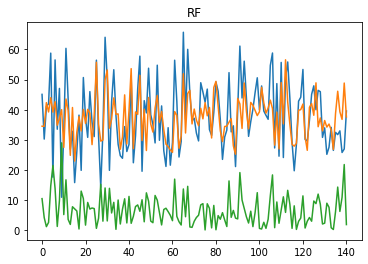

---------------------------------------------------
cv #3
Mean Absolute Error: 7.000370340804444
Mean Squared Error: 82.22958252282817
Root Mean Squared Error: 9.068052851788424


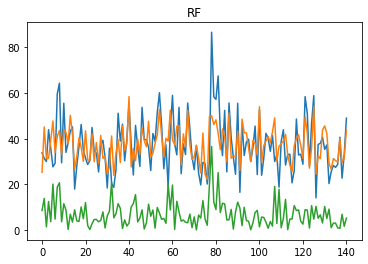

---------------------------------------------------
cv #4
Mean Absolute Error: 6.367596952394995
Mean Squared Error: 70.0903491088976
Root Mean Squared Error: 8.371997916202416


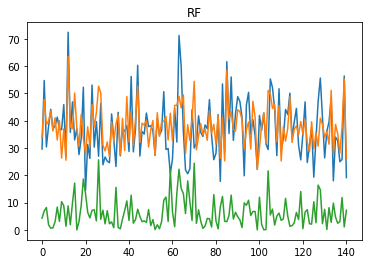

---------------------------------------------------
cv #5
Mean Absolute Error: 7.291249322086574
Mean Squared Error: 91.33320180701914
Root Mean Squared Error: 9.556840576624637


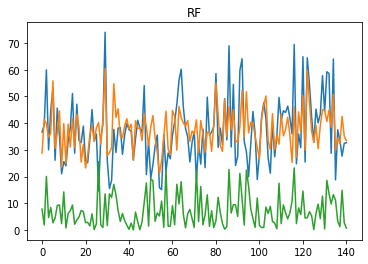

---------------------------------------------------
cv #6
Mean Absolute Error: 6.866693421973011
Mean Squared Error: 73.10695670471085
Root Mean Squared Error: 8.550260622034328


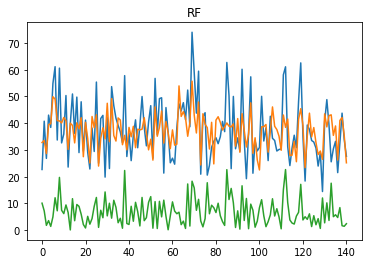

---------------------------------------------------
cv #7
Mean Absolute Error: 7.429964309440983
Mean Squared Error: 93.44611061997544
Root Mean Squared Error: 9.666752847775484


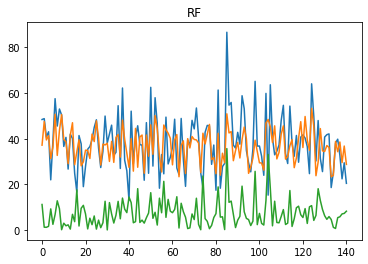

---------------------------------------------------
cv #8
Mean Absolute Error: 6.904822443569907
Mean Squared Error: 78.43832972275044
Root Mean Squared Error: 8.856541634450235


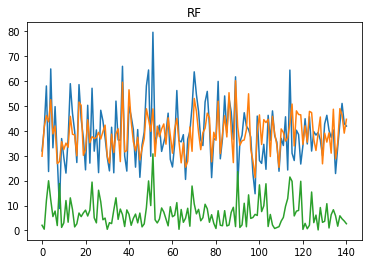

---------------------------------------------------
cv #9
Mean Absolute Error: 7.405662378834554
Mean Squared Error: 88.02442072742906
Root Mean Squared Error: 9.382133058501624


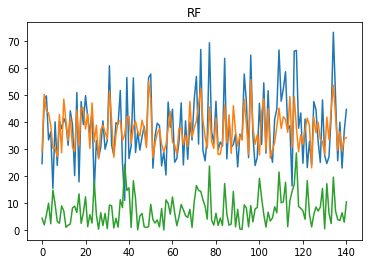

---------------------------------------------------
cv #10
Mean Absolute Error: 6.616492796220894
Mean Squared Error: 69.9528413875443
Root Mean Squared Error: 8.363781524379046


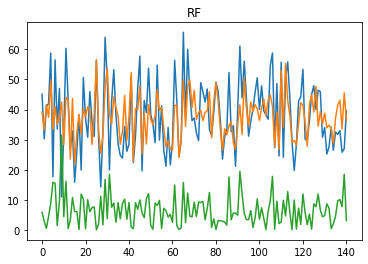

---------------------------------------------------
cv #11
Mean Absolute Error: 6.783055629183403
Mean Squared Error: 83.32966438059542
Root Mean Squared Error: 9.128508332723118


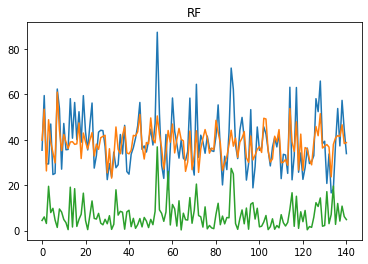

---------------------------------------------------
cv #12
Mean Absolute Error: 6.056958110488212
Mean Squared Error: 59.57105696722546
Root Mean Squared Error: 7.7182288750221355


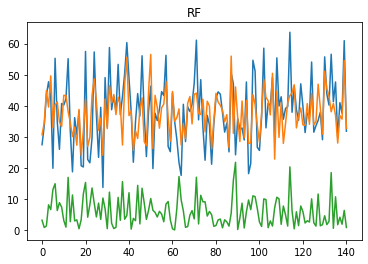

---------------------------------------------------
cv #13
Mean Absolute Error: 6.66884020300939
Mean Squared Error: 72.63326945168656
Root Mean Squared Error: 8.522515441563398


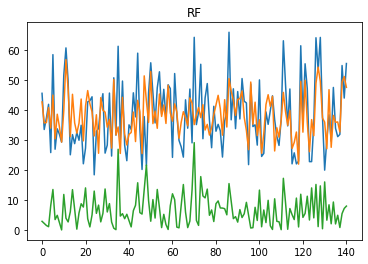

---------------------------------------------------
cv #14
Mean Absolute Error: 6.299854037579873
Mean Squared Error: 62.45355734061921
Root Mean Squared Error: 7.902756312870796


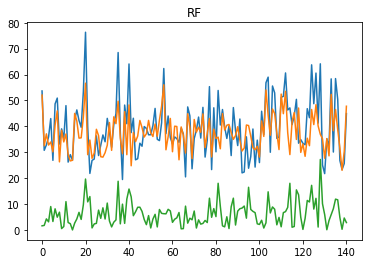

---------------------------------------------------
cv #15
Mean Absolute Error: 6.117156291572162
Mean Squared Error: 56.92963944149113
Root Mean Squared Error: 7.545173254570841


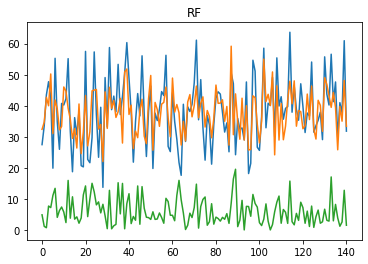

---------------------------------------------------
cv #16
Mean Absolute Error: 6.742859997326701
Mean Squared Error: 75.56579090273324
Root Mean Squared Error: 8.692858615135371


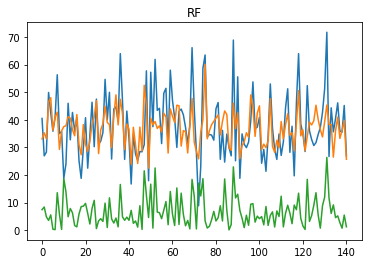

---------------------------------------------------
cv #17
Mean Absolute Error: 6.625834604962224
Mean Squared Error: 76.38942475395898
Root Mean Squared Error: 8.740104390335334


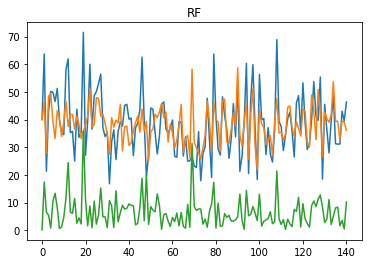

---------------------------------------------------
cv #18
Mean Absolute Error: 6.46775748158551
Mean Squared Error: 75.0666414923707
Root Mean Squared Error: 8.664100731891955


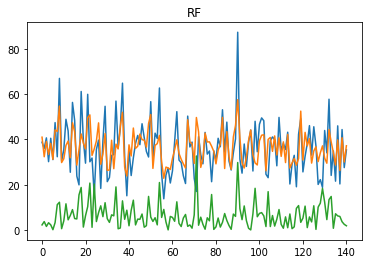

---------------------------------------------------
cv #19
Mean Absolute Error: 7.030993037651471
Mean Squared Error: 87.56980559032617
Root Mean Squared Error: 9.357873988803556


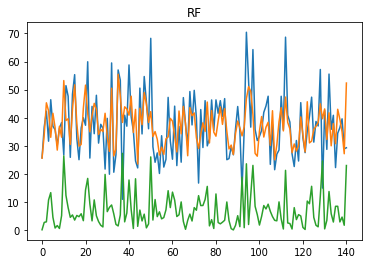

---------------------------------------------------
cv #20
Mean Absolute Error: 6.529638742339731
Mean Squared Error: 66.03634319080308
Root Mean Squared Error: 8.126274865570513


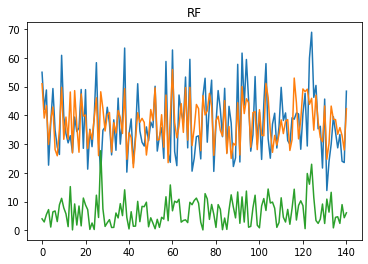

---------------------------------------------------


In [47]:
mae = []
rmse = []
mape = []
rsquared = []
for runNumber in range(1,21):
    y_test, y_pred, maeTemp, rmseTemp, rsquaredTemp = rf(full_XY, runNumber)
    mape.append(np.mean(np.abs((y_test - y_pred)/y_test))*100)
    mae.append(maeTemp)
    rmse.append(rmseTemp)
    rsquared.append(rsquaredTemp)

In [45]:
print(np.mean(full_XY.rating))
print(np.mean(mae))
print(np.mean(rmse))
print(np.mean(mape))
print(np.mean(rsquared))

37.43115687039301
6.997870651197367
9.015698944190344
20.95417862683533
0.3917097060412812


In [ ]:
# Accuracy
1-np.mean(mae)/np.mean(full_XY.rating)

In [ ]:
# If we were to predict with average
temp = abs(y_test - np.mean(full_XY.rating))
1-np.mean(temp)/np.mean(full_XY.rating)

In [ ]:
# Mape of predicting average
np.mean(np.abs((y_test - np.mean(full_XY.rating)) / y_test))*100

# Feature Importance Decay

In [59]:
df = full_XY
X = df.iloc[:,list(range(2,101))].values
y = df.iloc[:, 1].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=int(100*np.random.random()))

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(max_depth = 8, n_estimators=20, random_state=int(100*np.random.random()))
regressor.fit(X_train, y_train)
regressor.feature_importances_

array([6.34220884e-03, 1.05627594e-02, 5.79523394e-03, 5.10793817e-03,
       7.05491434e-03, 5.35531188e-03, 1.11619173e-02, 2.34323771e-03,
       1.86735900e-03, 4.67552312e-03, 4.76506426e-03, 7.35809145e-04,
       6.31417375e-04, 1.06687343e-02, 6.12560380e-03, 2.29337477e-03,
       1.02611752e-02, 6.56707612e-03, 4.17931188e-03, 2.45421555e-03,
       4.34570858e-03, 6.76450333e-03, 4.37444125e-03, 6.12085650e-02,
       1.29781534e-02, 3.42520166e-02, 2.44866041e-03, 9.40748509e-02,
       4.43365380e-04, 6.63146556e-03, 3.80782740e-02, 9.85441179e-02,
       4.76733976e-03, 2.37456283e-03, 4.18065594e-03, 8.54252268e-03,
       5.02196629e-03, 3.17881584e-03, 2.11382697e-03, 5.17492429e-03,
       2.31666853e-03, 2.64778062e-03, 1.23182844e-03, 4.70846033e-03,
       6.10952345e-03, 1.67541343e-03, 6.15323561e-05, 7.05616873e-03,
       6.70452940e-03, 2.30652170e-03, 6.09021241e-03, 1.11748043e-03,
       2.52771172e-05, 4.68174107e-03, 1.22183837e-02, 5.31486370e-04,
      

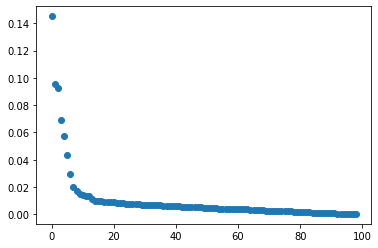

In [57]:
plt.plot(np.flip(np.sort(regressor.feature_importances_)), lineStyle='none',marker='o')